In [40]:
import numpy as np
import pandas as pd


In [41]:
##Importação dos dados de treino

In [42]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_10376\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_10376\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_10376\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [43]:
##Remoção de colunas inteiramente preenchidas por NaN

In [44]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [45]:
##Introdução do cabeçalho do data frame

In [46]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [47]:
##Geração de Histogramas e seleção de variáveis

In [48]:
import seaborn as sns 
import matplotlib.pyplot as plt

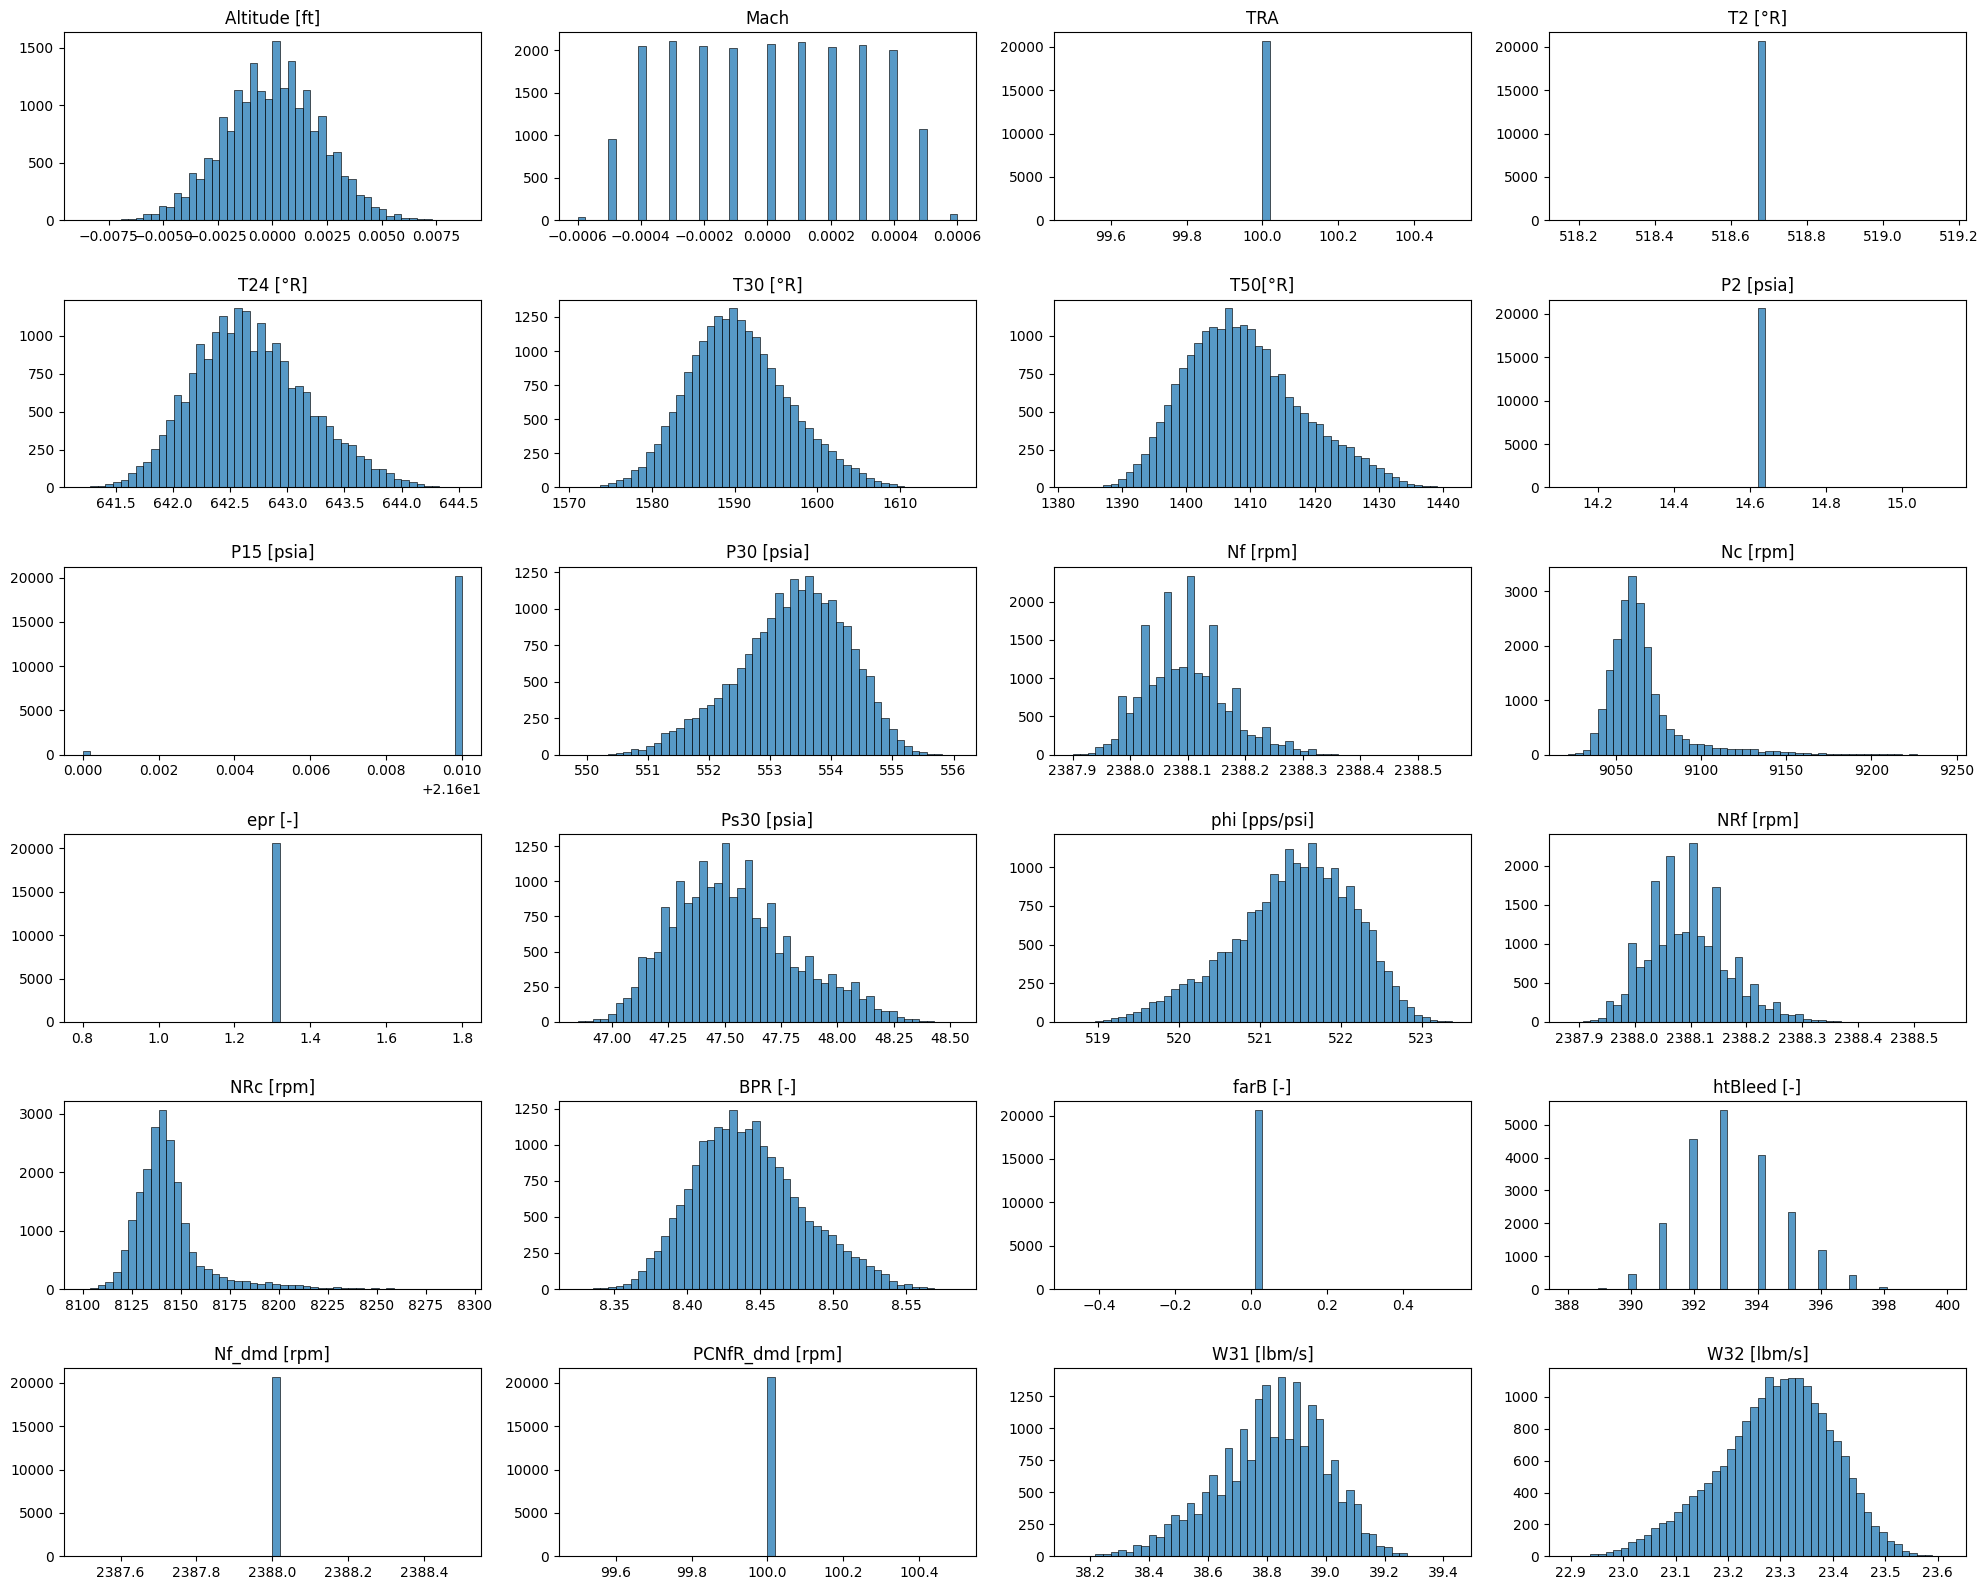

In [49]:
fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [50]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [51]:
##Normalização 

In [52]:
from sklearn.preprocessing import MinMaxScaler

features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [53]:
##Definição dos targets para regressão e classificação nos dados de treino

In [54]:
limit_r = 130 
limit_c = 50
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit_r:
            aux.append(limit_r)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]
label_train = [1 if x >= limit_c else 0 for x in rul_train]

In [55]:
##Visualização de um ciclo de vida de um motor 

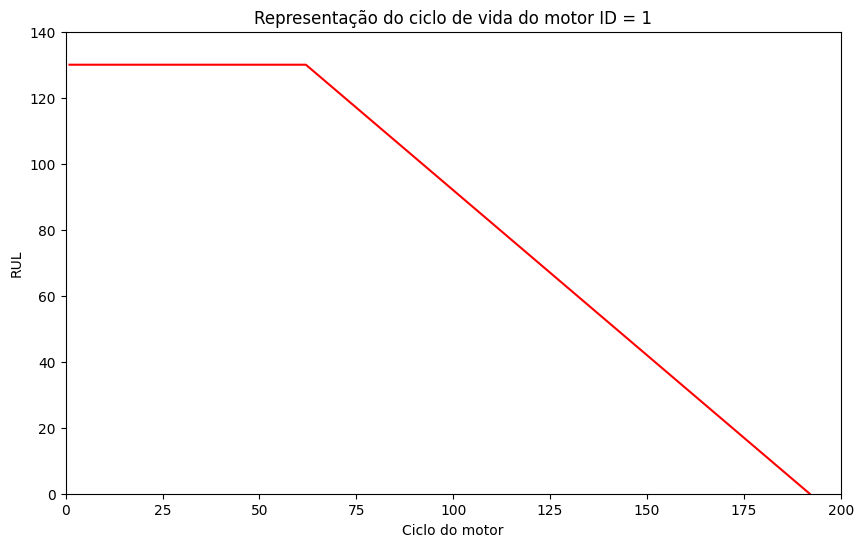

In [56]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [57]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [58]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit_r:
            rul_test.append(limit_r)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]
label_test = [1 if x >= limit_c else 0 for x in rul_test] 

In [59]:
##Criação das janelas de tempo para dados de treino e de teste

In [60]:
def time_window(data,rul,label,window_size,step):
    x,y_r,y_c = [], [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y_r.append(rul[l+f-1]) 
            y_c.append(label[l+f-1])
        l += len(engine)
    return np.array(x), np.array(y_r), np.array(y_c)
window_size = 30
step = 1
x_train, y_train_r,y_train_c= time_window(features_train,rul_train,
                                                        label_train,window_size,step)

print(x_train.shape,y_train_r.shape,y_train_c.shape)  
x_test, y_test_r,y_test_c = time_window(features_test,rul_test,
                                                        label_test,window_size,step)
print(x_test.shape,y_test_r.shape,y_test_c.shape)

(17731, 30, 18) (17731,) (17731,)
(10196, 30, 18) (10196,) (10196,)


In [61]:
##Separação das variáveis de treino e teste

In [62]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train_r,test_size=0.2,random_state=1)
x3,x4,y3,y4 = train_test_split(x_train,y_train_c,test_size=0.2,random_state=1) 

x1=x1.astype('float32')
x2=x2.astype('float32')
x3=x3.astype('float32')
x4=x4.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')
y3=y3.astype('float32')
y4=y4.astype('float32')


In [63]:
##Criação do modelo de classificação

In [64]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time 

shape1 = (x3.shape[1], x3.shape[2])

def build_model_classification(hp):
    model=Sequential()
    n_layers_lstm_c=hp.Int('layers_lstm_c',1,4)
    n_layers_dense_c=hp.Int('layers_dense_c',1,3)
    model.add(LSTM(hp.Int('lstm_c_0',min_value=32,max_value=256,step=32),
                   activation='tanh',
                   return_sequences=True,input_shape=shape1))
    for i in range(n_layers_lstm_c):
        return_seq = i <n_layers_lstm_c -1
        model.add(LSTM(hp.Int(f'lstm_c_{i}',min_value=32,max_value=256,step=32),
                       activation='tanh',
                       return_sequences=return_seq))
    model.add(Dropout(0.25))
    for i in range(n_layers_dense_c):
        model.add(Dense(hp.Int(f'dense_c_{i+1}',min_value=32,max_value=256,step=32),
                        activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate_c',[0.01,0.001,0.0001])), 
                  loss='binary_crossentropy', 
              metrics=['accuracy','AUC'])
    return model 

start=time.time()
tuner_classification = keras_tuner.RandomSearch(build_model_classification,
                           objective='val_loss',
                           max_trials=5,
                           directory='C:/Users/davim/keras',
                           project_name='hiper_classificassion',
                           overwrite=True)

tuner_classification.search(x3,y3,epochs=10,validation_data=(x4,y4))
best_model_classification=tuner_classification.get_best_models()[0]
best_model_classification.summary()

Trial 5 Complete [00h 11m 17s]
val_loss: 0.08799977600574493

Best val_loss So Far: 0.08799977600574493
Total elapsed time: 00h 38m 04s


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 34 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │        75,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 224)        │       316,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 160)            │       246,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 160)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 96)             │        15,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            97 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785,089 (2.99 MB)

 Trainable params: 785,089 (2.99 MB)

 Non-trainable params: 0 (0.00 B)

In [65]:
##Treinando o modelo com os hiperparâmetros escolhidos

Epoch 1/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 467ms/step - AUC: 0.9934 - accuracy: 0.9619 - loss: 0.0896

71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 526ms/step - AUC: 0.9941 - accuracy: 0.9660 - loss: 0.0849 - val_AUC: 0.9947 - val_accuracy: 0.9631 - val_loss: 0.0869
Epoch 2/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - AUC: 0.9943 - accuracy: 0.9655 - loss: 0.0854

71/71 ━━━━━━━━━━━━━━━━━━━━ 34s 478ms/step - AUC: 0.9942 - accuracy: 0.9659 - loss: 0.0841 - val_AUC: 0.9946 - val_accuracy: 0.9653 - val_loss: 0.0880
Epoch 3/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step - AUC: 0.9954 - accuracy: 0.9692 - loss: 0.0772

71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 470ms/step - AUC: 0.9953 - accuracy: 0.9684 - loss: 0.0777 - val_AUC: 0.9948 - val_accuracy: 0.9642 - val_loss: 0.0842
Epoch 4/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step - AUC: 0.9954 - accuracy: 0.9679 - loss: 0.0765

71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 463ms/step - AUC: 0.9952 - accuracy: 0.9666 - loss: 0.0779 - val_AUC: 0.9949 - val_accuracy: 0.9670 - val_loss: 0.0826
Epoch 5/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - AUC: 0.9956 - accuracy: 0.9686 - loss: 0.0749

71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 466ms/step - AUC: 0.9954 - accuracy: 0.9681 - loss: 0.0770 - val_AUC: 0.9952 - val_accuracy: 0.9679 - val_loss: 0.0811
Epoch 6/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - AUC: 0.9963 - accuracy: 0.9707 - loss: 0.0681

71/71 ━━━━━━━━━━━━━━━━━━━━ 32s 457ms/step - AUC: 0.9958 - accuracy: 0.9690 - loss: 0.0718 - val_AUC: 0.9941 - val_accuracy: 0.9617 - val_loss: 0.0926
Epoch 7/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - AUC: 0.9959 - accuracy: 0.9695 - loss: 0.0720

71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 461ms/step - AUC: 0.9957 - accuracy: 0.9693 - loss: 0.0727 - val_AUC: 0.9952 - val_accuracy: 0.9684 - val_loss: 0.0844
Epoch 8/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - AUC: 0.9956 - accuracy: 0.9678 - loss: 0.0744

71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 573ms/step - AUC: 0.9955 - accuracy: 0.9674 - loss: 0.0759 - val_AUC: 0.9946 - val_accuracy: 0.9600 - val_loss: 0.0993
Epoch 9/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - AUC: 0.9955 - accuracy: 0.9689 - loss: 0.0761

71/71 ━━━━━━━━━━━━━━━━━━━━ 32s 457ms/step - AUC: 0.9959 - accuracy: 0.9710 - loss: 0.0713 - val_AUC: 0.9963 - val_accuracy: 0.9687 - val_loss: 0.0706
Epoch 10/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step - AUC: 0.9959 - accuracy: 0.9709 - loss: 0.0718

71/71 ━━━━━━━━━━━━━━━━━━━━ 32s 458ms/step - AUC: 0.9961 - accuracy: 0.9708 - loss: 0.0705 - val_AUC: 0.9967 - val_accuracy: 0.9665 - val_loss: 0.0728
Epoch 11/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - AUC: 0.9964 - accuracy: 0.9706 - loss: 0.0675

71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 464ms/step - AUC: 0.9960 - accuracy: 0.9702 - loss: 0.0706 - val_AUC: 0.9953 - val_accuracy: 0.9732 - val_loss: 0.0773
Epoch 12/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step - AUC: 0.9966 - accuracy: 0.9729 - loss: 0.0671

71/71 ━━━━━━━━━━━━━━━━━━━━ 33s 473ms/step - AUC: 0.9964 - accuracy: 0.9721 - loss: 0.0679 - val_AUC: 0.9957 - val_accuracy: 0.9681 - val_loss: 0.0765
Epoch 13/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 508ms/step - AUC: 0.9957 - accuracy: 0.9714 - loss: 0.0701

71/71 ━━━━━━━━━━━━━━━━━━━━ 41s 577ms/step - AUC: 0.9960 - accuracy: 0.9719 - loss: 0.0698 - val_AUC: 0.9959 - val_accuracy: 0.9681 - val_loss: 0.0747
Epoch 14/100
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step - AUC: 0.9958 - accuracy: 0.9692 - loss: 0.0714

71/71 ━━━━━━━━━━━━━━━━━━━━ 35s 502ms/step - AUC: 0.9960 - accuracy: 0.9723 - loss: 0.0672 - val_AUC: 0.9932 - val_accuracy: 0.9662 - val_loss: 0.0923


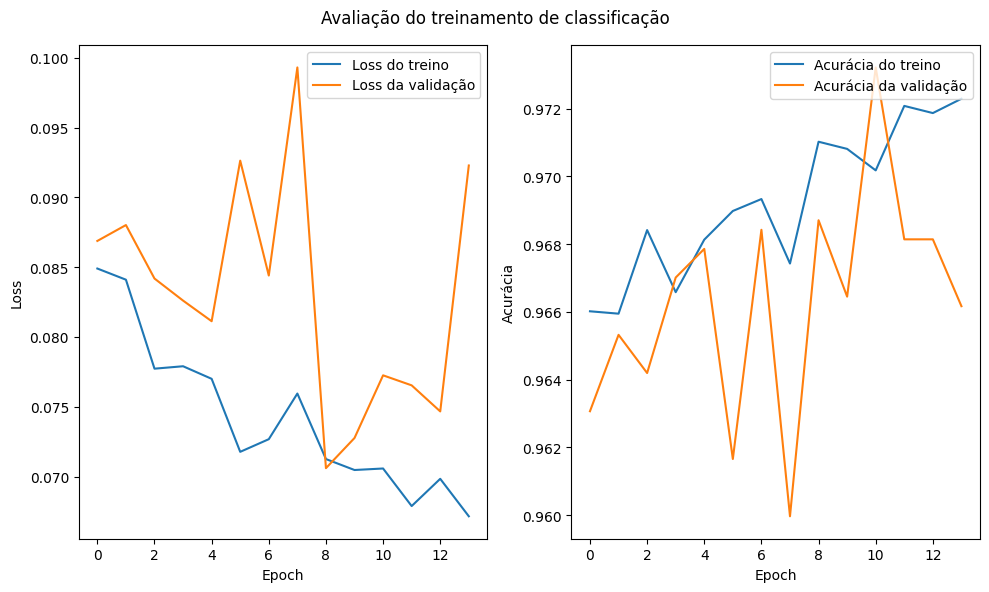

In [66]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model_c.h5', monitor='val_loss')
history_c=best_model_classification.fit(x3,y3,validation_data=(x4,y4),
                                                     epochs=100,batch_size=200,
                                                     callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_c.history['loss'], label='Loss do treino')
plt.plot(history_c.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_c.history['accuracy'], label='Acurácia do treino')
plt.plot(history_c.history['val_accuracy'], label='Acurácia da validação')
plt.xlabel('Epoch')
plt.ylabel('Acurácia')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento de classificação')
plt.tight_layout()
plt.show()

In [67]:
##Teste do modelo

In [68]:
rul_prev_c = best_model_classification.predict(x_test).reshape(-1)
end=time.time()
rul_prev_c_l =np.where(rul_prev_c<0.5,0,1)

319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step


In [69]:
##Avaliação do modelo

0.9672420557081208
0.9805825242718447
0.9837311356095473
0.9821543064757426
Tempo de 2785.0475084781647s


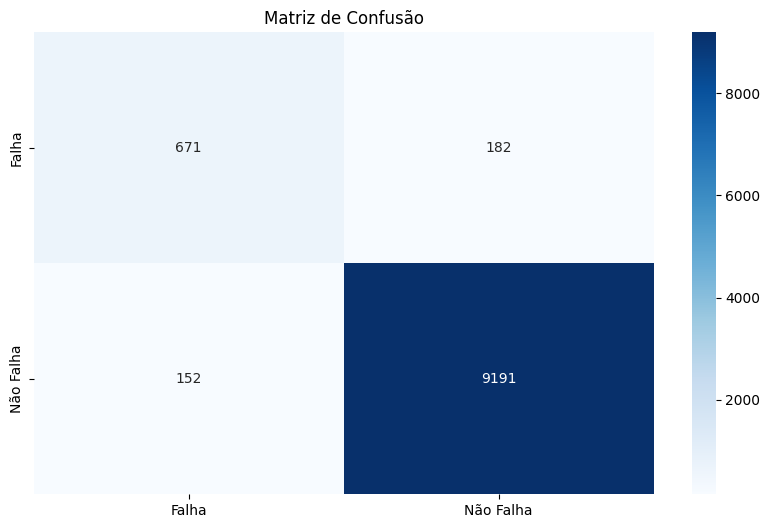

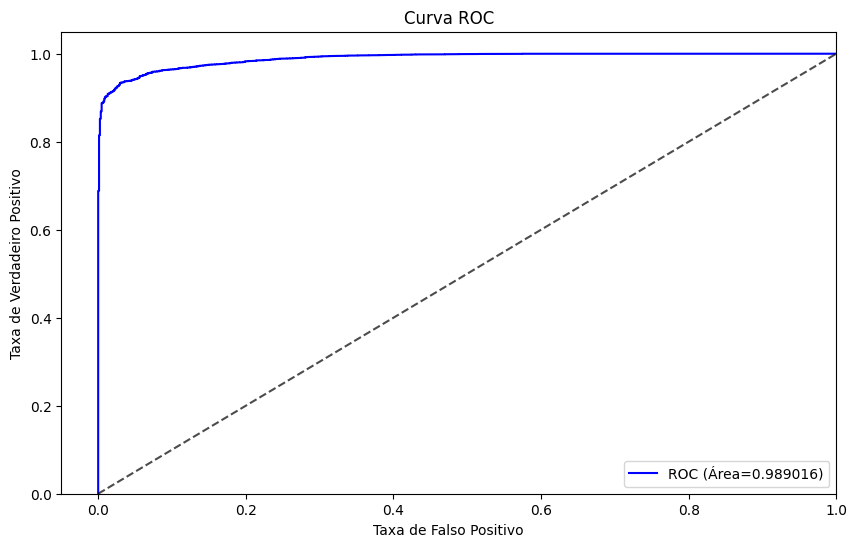

In [70]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,auc,roc_curve
print(accuracy_score(y_test_c,rul_prev_c_l))
print(precision_score(y_test_c,rul_prev_c_l))
print(recall_score(y_test_c,rul_prev_c_l))
print(f1_score(y_test_c,rul_prev_c_l))
print(f'Tempo de {end-start}s')

matriz=confusion_matrix(y_test_c,rul_prev_c_l)
plt.figure(figsize=(10,6))
sns.heatmap(matriz,annot=True,cmap='Blues',fmt='d',
            xticklabels=['Falha','Não Falha'],yticklabels=['Falha','Não Falha'])
plt.title('Matriz de Confusão')
plt.show()

fpr,tpr,thresholds=roc_curve(y_test_c,rul_prev_c)
auc_model = auc(fpr,tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='blue',label=f'ROC (Área={auc_model:2f})')
plt.plot([0,1],[0,1],ls='--',c='black',alpha=0.7)
plt.xlim(-0.05,1)
plt.ylim(0,1.05)
plt.xlabel('Taxa de Falso Positivo')
plt.ylabel('Taxa de Verdadeiro Positivo')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [71]:
##Criação do modelo de regressão

In [72]:
shape2 = (x1.shape[1], x1.shape[2])

def build_model_regression(hp):
    model=Sequential()
    n_layers_lstm_r=hp.Int('layers_lstm_r',1,4)
    n_layers_dense_r=hp.Int('layers_dense_r',1,3)
    model.add(LSTM(hp.Int('lstm_r_0',min_value=32,max_value=256,step=32),
                   activation='tanh',
                   return_sequences=True,input_shape=shape2))
    for i in range(n_layers_lstm_r):
        return_seq = i <n_layers_lstm_r -1
        model.add(LSTM(hp.Int(f'lstm_r_{i}',min_value=32,max_value=256,step=32),
                       activation='tanh',
                       return_sequences=return_seq))
    model.add(Dropout(0.25))
    for i in range(n_layers_dense_r):
        model.add(Dense(hp.Int(f'dense_r_{i+1}',min_value=32,max_value=256,step=32),
                activation='relu'))
    model.add(Dense(1,activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=hp.Choice('learning_rate_r',[0.01,0.001,0.0001])), 
                  loss='mse', 
              metrics=['mean_squared_error','mean_absolute_error'])
    return model 

start=time.time()
tuner_regression = keras_tuner.RandomSearch(build_model_regression,
                           objective='val_loss',
                           max_trials=5,
                           directory='C:/Users/davim/keras',
                           project_name='hiper_regression',
                           overwrite=True)

tuner_regression.search(x1,y1,epochs=10,validation_data=(x2,y2))
best_model_regression=tuner_regression.get_best_models()[0]
best_model_regression.summary()

Trial 5 Complete [00h 02m 57s]
val_loss: 371.4717102050781

Best val_loss So Far: 197.4481201171875
Total elapsed time: 00h 28m 47s


c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 256)        │       281,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 256)        │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 160)            │        20,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,156,417 (4.41 MB)

 Trainable params: 1,156,417 (4.41 MB)

 Non-trainable params: 0 (0.00 B)

In [73]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 556ms/step - loss: 256.0884 - mean_absolute_error: 11.7164 - mean_squared_error: 256.0884

71/71 ━━━━━━━━━━━━━━━━━━━━ 48s 621ms/step - loss: 228.5371 - mean_absolute_error: 11.1244 - mean_squared_error: 228.5371 - val_loss: 203.6858 - val_mean_absolute_error: 10.5464 - val_mean_squared_error: 203.6858
Epoch 2/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 555ms/step - loss: 215.8321 - mean_absolute_error: 10.8548 - mean_squared_error: 215.8321

71/71 ━━━━━━━━━━━━━━━━━━━━ 44s 624ms/step - loss: 213.7964 - mean_absolute_error: 10.7634 - mean_squared_error: 213.7964 - val_loss: 194.8663 - val_mean_absolute_error: 10.5234 - val_mean_squared_error: 194.8663
Epoch 3/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 539ms/step - loss: 205.1559 - mean_absolute_error: 10.5585 - mean_squared_error: 205.1559

71/71 ━━━━━━━━━━━━━━━━━━━━ 43s 606ms/step - loss: 204.9140 - mean_absolute_error: 10.5360 - mean_squared_error: 204.9140 - val_loss: 184.0563 - val_mean_absolute_error: 10.2221 - val_mean_squared_error: 184.0563
Epoch 4/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 534ms/step - loss: 205.5097 - mean_absolute_error: 10.5315 - mean_squared_error: 205.5097

71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 596ms/step - loss: 202.7307 - mean_absolute_error: 10.4445 - mean_squared_error: 202.7307 - val_loss: 204.5181 - val_mean_absolute_error: 10.8733 - val_mean_squared_error: 204.5181
Epoch 5/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 547ms/step - loss: 208.4118 - mean_absolute_error: 10.6213 - mean_squared_error: 208.4118

71/71 ━━━━━━━━━━━━━━━━━━━━ 43s 610ms/step - loss: 204.3100 - mean_absolute_error: 10.5334 - mean_squared_error: 204.3100 - val_loss: 225.1206 - val_mean_absolute_error: 11.0557 - val_mean_squared_error: 225.1206
Epoch 6/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 544ms/step - loss: 200.2812 - mean_absolute_error: 10.3236 - mean_squared_error: 200.2812

71/71 ━━━━━━━━━━━━━━━━━━━━ 43s 604ms/step - loss: 198.9724 - mean_absolute_error: 10.3150 - mean_squared_error: 198.9724 - val_loss: 183.2488 - val_mean_absolute_error: 10.2884 - val_mean_squared_error: 183.2488
Epoch 7/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 546ms/step - loss: 193.1089 - mean_absolute_error: 10.1853 - mean_squared_error: 193.1089

71/71 ━━━━━━━━━━━━━━━━━━━━ 45s 636ms/step - loss: 196.2424 - mean_absolute_error: 10.2606 - mean_squared_error: 196.2424 - val_loss: 191.8730 - val_mean_absolute_error: 10.5663 - val_mean_squared_error: 191.8730
Epoch 8/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 531ms/step - loss: 198.1413 - mean_absolute_error: 10.2886 - mean_squared_error: 198.1413

71/71 ━━━━━━━━━━━━━━━━━━━━ 42s 591ms/step - loss: 194.1793 - mean_absolute_error: 10.1589 - mean_squared_error: 194.1793 - val_loss: 178.6731 - val_mean_absolute_error: 10.2130 - val_mean_squared_error: 178.6731
Epoch 9/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 536ms/step - loss: 190.8328 - mean_absolute_error: 10.1958 - mean_squared_error: 190.8328

71/71 ━━━━━━━━━━━━━━━━━━━━ 43s 602ms/step - loss: 192.7026 - mean_absolute_error: 10.1666 - mean_squared_error: 192.7026 - val_loss: 185.9987 - val_mean_absolute_error: 10.3632 - val_mean_squared_error: 185.9987
Epoch 10/10
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - loss: 194.9503 - mean_absolute_error: 10.2798 - mean_squared_error: 194.9503

71/71 ━━━━━━━━━━━━━━━━━━━━ 43s 611ms/step - loss: 192.0841 - mean_absolute_error: 10.1541 - mean_squared_error: 192.0841 - val_loss: 158.3426 - val_mean_absolute_error: 8.9438 - val_mean_squared_error: 158.3426


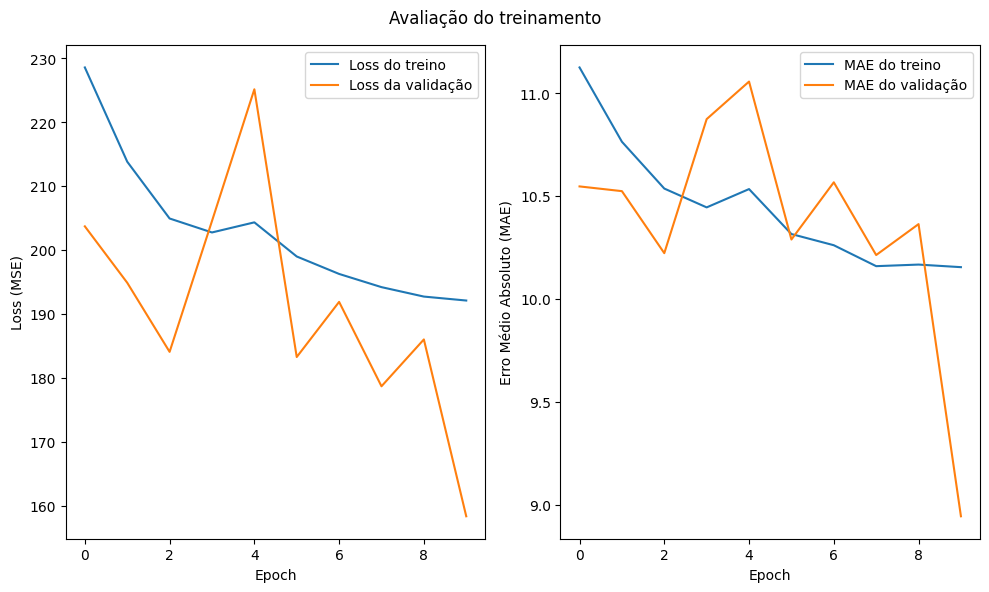

In [74]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model_r.h5', monitor='val_loss')
history_r=best_model_regression.fit(x1,y1,validation_data=(x2,y2),epochs=10,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_r.history['loss'], label='Loss do treino')
plt.plot(history_r.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_r.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_r.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento')
plt.tight_layout()
plt.show()

In [75]:
##Testando o modelo com os dados de teste 

In [76]:
rul_prev_r = best_model_regression.predict(x_test).reshape(-1)
rul_prev_r = [float(x) for x in rul_prev_r]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 16s 50ms/step


In [77]:
##Avaliando o modelo

197.633142519634
14.06
0.11542726209450672
10.453952558698164
0.8004382301722173
Tempo de 2182.2671072483063s


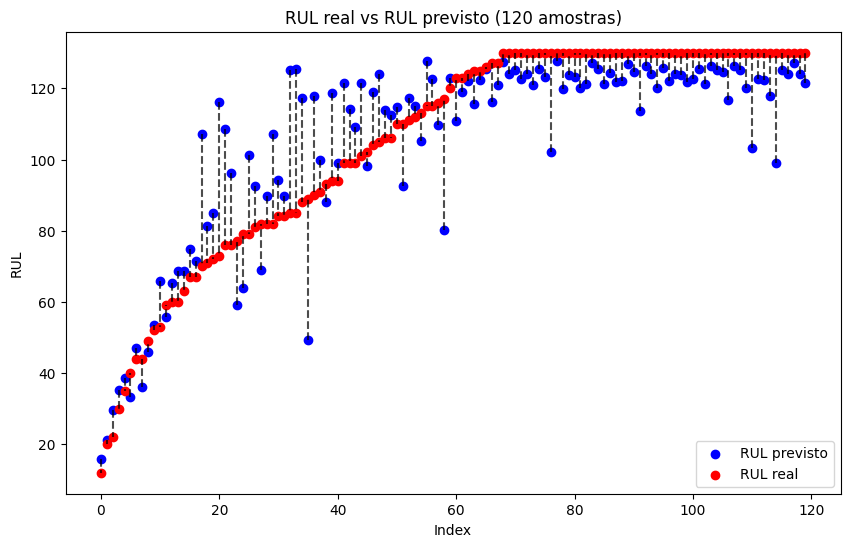

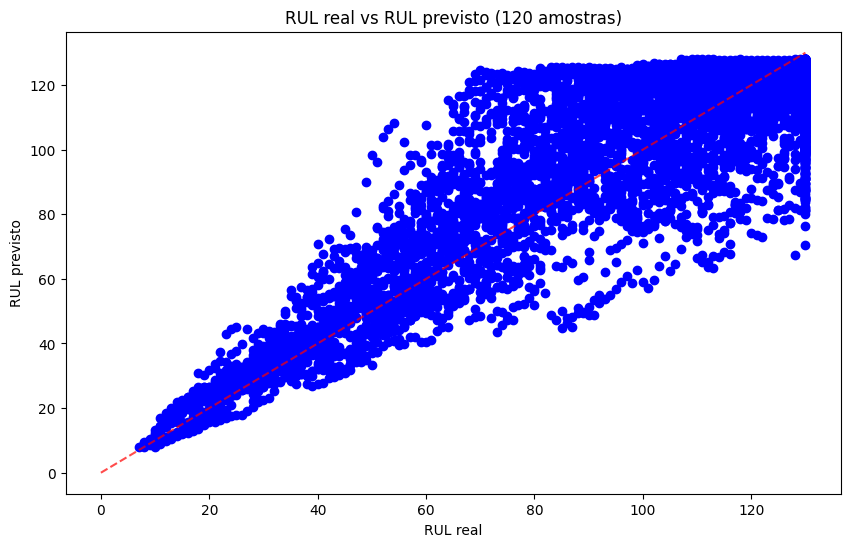

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test_r,rul_prev_r))
print(f'{np.sqrt(mean_squared_error(y_test_r,rul_prev_r)):.2f}')
print(mean_absolute_percentage_error(y_test_r,rul_prev_r))
print(mean_absolute_error(y_test_r,rul_prev_r))
print(r2_score(y_test_r,rul_prev_r))  
print(f'Tempo de {end-start}s') 

n_amostras = 120
indices = np.random.choice(len(rul_prev_r),size=n_amostras,replace=False)
y_real_amostra_r=np.array(y_test_r)[indices]
y_prev_amostra_r=np.array(rul_prev_r)[indices]
ordem = np.argsort(y_real_amostra_r)
y_real_amostra_r=y_real_amostra_r[ordem]
y_prev_amostra_r=y_prev_amostra_r[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra_r,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra_r,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra_r[i],y_real_amostra_r[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test_r,rul_prev_r,c='blue')
plt.plot([0,limit_r],[0,limit_r],ls='--',c='red',alpha=0.8)
plt.title(f'RUL real vs RUL previsto amostras)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()